In [1]:
import numpy as np
import pandas as pd

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
df=pd.read_csv('loan_test.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [36]:
a=df['terms']
b=df['Principal']
c=pd.DataFrame({'id':a,'outcome':b})
c.to_csv('c.csv',index=False)

In [38]:
d=pd.read_csv('c.csv')
d.head()

,id,outcome
0,30,1000
1,7,300
2,30,1000
3,30,1000
4,15,800


In [5]:
df.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

In [6]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender'],
      dtype='object')

In [7]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'],axis=1,inplace=True)

In [4]:
df.replace({'male':0,'female':1},inplace=True)

In [5]:
df.replace({'PAIDOFF':1,'COLLECTION':0},inplace=True)

In [15]:
df['loan_status'].value_counts()

1    40
0    14
Name: loan_status, dtype: int64

In [16]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1000,30,9/8/2016,10/7/2016,50,Bechalor,1
1,1,300,7,9/9/2016,9/15/2016,35,Master or Above,0
2,1,1000,30,9/10/2016,10/9/2016,43,High School or Below,1
3,1,1000,30,9/10/2016,10/9/2016,26,college,0
4,1,800,15,9/11/2016,9/25/2016,29,Bechalor,0


<Figure size 432x288 with 0 Axes>

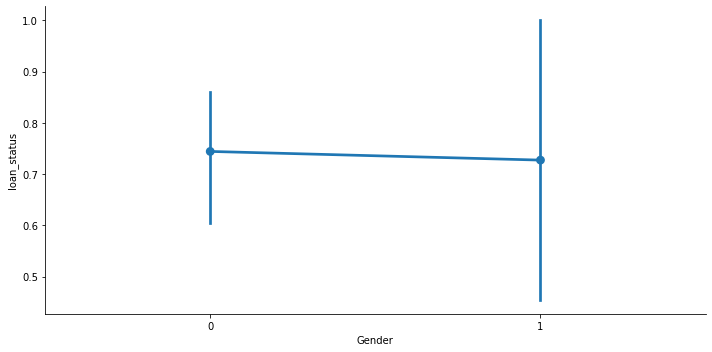

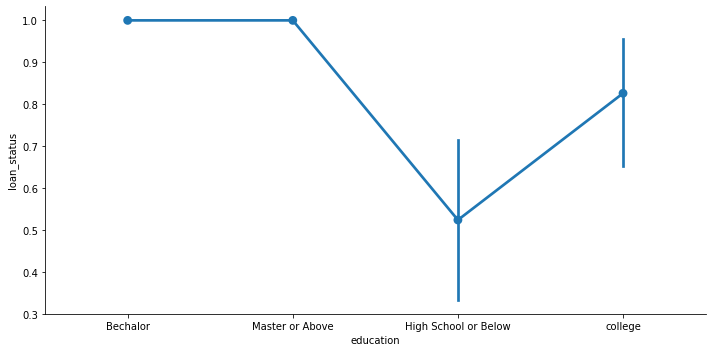

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
for i,col in enumerate(['Gender','education']):
    plt.figure(i)
    sns.catplot(x=col,y='loan_status',data=df,kind='point',aspect=2)  

In [3]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.727273
        COLLECTION     0.272727
male    PAIDOFF        0.744186
        COLLECTION     0.255814
Name: loan_status, dtype: float64

In [4]:
df['loan_status'].replace({'PAIDOFF':1,'COLLECTION':0},inplace=True)

In [5]:
df.groupby(['Gender'])['loan_status'].mean()

Gender
female    0.727273
male      0.744186
Name: loan_status, dtype: float64

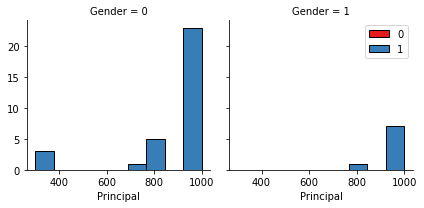

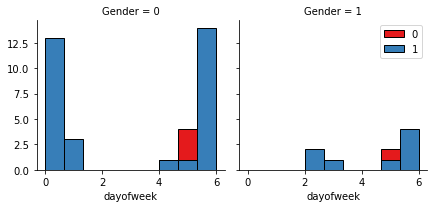

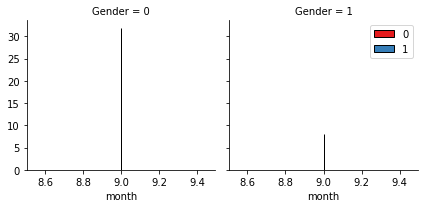

In [24]:
#for getting those ibm plots
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

df['effective_date']=pd.to_datetime(df['effective_date'])
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


df['month'] = df['effective_date'].dt.month
bins = np.linspace(df.month.min(), df.month.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'month', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [25]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,month
0,1,1000,30,2016-09-08,10/7/2016,50,Bechalor,1,3,9
1,1,300,7,2016-09-09,9/15/2016,35,Master or Above,0,4,9
2,1,1000,30,2016-09-10,10/9/2016,43,High School or Below,1,5,9
3,1,1000,30,2016-09-10,10/9/2016,26,college,0,5,9
4,1,800,15,2016-09-11,9/25/2016,29,Bechalor,0,6,9


In [7]:
df['due_date']=pd.to_datetime(df['due_date'])
df['effective_date']=pd.to_datetime(df['effective_date'])
df['deadline']=df['due_date']-df['effective_date']

In [8]:
df['deadline']=df['deadline'].dt.days

In [9]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,deadline
0,1,1,1,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,29
1,5,5,1,300,7,2016-09-09,2016-09-15,35,Master or Above,0,6
2,21,21,1,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,29
3,24,24,1,1000,30,2016-09-10,2016-10-09,26,college,0,29
4,35,35,1,800,15,2016-09-11,2016-09-25,29,Bechalor,0,14


In [10]:
df['dayofweek']=df.apply(lambda row:1 if row['dayofweek']>3 else 0,axis=1)
df['dayofweek']

KeyError: 'dayofweek'

[1000, 1000, 800, 1000, 800, 1000, 1000, 1000, 800, 1000, 800, 1000, 800, 1000]
[1000, 300, 1000, 1000, 800, 700, 1000, 1000, 800, 1000, 800, 300, 1000, 1000, 1000, 1000, 800, 1000, 1000, 1000, 1000, 1000, 300, 1000, 1000, 800, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 800, 1000, 1000]


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


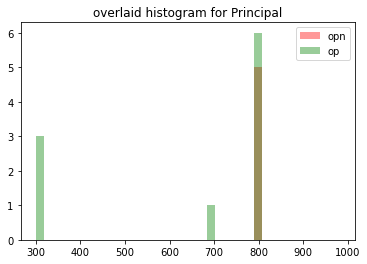

[30, 15, 15, 30, 15, 30, 15, 30, 15, 30, 15, 30, 15, 30]
[30, 7, 30, 30, 15, 15, 15, 30, 15, 15, 15, 7, 30, 30, 30, 30, 15, 7, 15, 7, 30, 7, 7, 15, 15, 30, 30, 30, 30, 30, 30, 15, 30, 30, 15, 30, 30, 15, 30, 30]


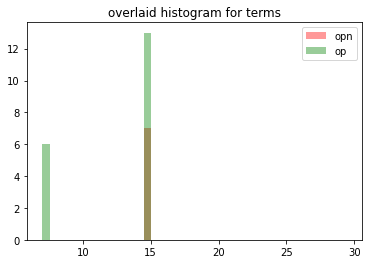

[29, 14, 14, 29, 14, 29, 29, 29, 14, 29, 14, 29, 14, 29]
[29, 6, 29, 29, 14, 14, 14, 29, 14, 14, 14, 6, 29, 29, 29, 59, 14, 6, 14, 6, 29, 6, 6, 44, 14, 29, 29, 29, 29, 59, 29, 14, 59, 29, 14, 29, 29, 14, 29, 29]


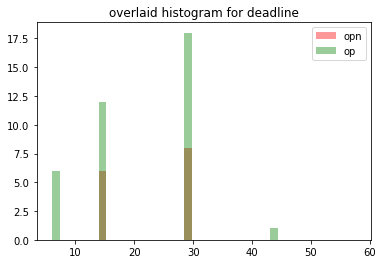

[33, 31, 41, 30, 26, 20, 26, 24, 27, 32, 29, 37, 36, 33]
[50, 35, 43, 26, 29, 33, 24, 32, 27, 37, 24, 35, 31, 37, 37, 33, 43, 32, 26, 29, 30, 27, 37, 29, 26, 28, 38, 46, 33, 29, 29, 36, 29, 30, 36, 29, 28, 23, 38, 30]


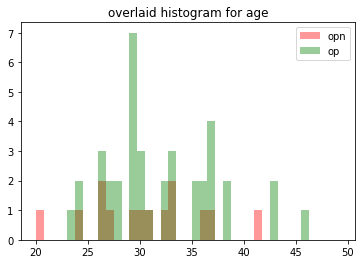

In [34]:
for i in ['Principal','terms','deadline','age']:
    opn=list(df[df['loan_status']==0][i].dropna())
    op=list(df[df['loan_status']==1][i].dropna())
    xmin=min(min(opn),min(op))
    xmax=max(max(opn),max(op))
    width=(xmax-xmin)/40
    print(opn)
    print(op)
    sns.distplot(opn,color='r',kde=False,bins=np.arange(xmin,xmax,width))
    sns.distplot(op,color='g',kde=False,bins=np.arange(xmin,xmax,width))
    plt.legend(['opn','op'])
    plt.title('overlaid histogram for {}'.format(i))
    plt.show()

In [35]:
df.corr()

,loan_status,Principal,terms,age,Gender,dayofweek,month,deadline
loan_status,1.000000,-0.047161,-0.041384,0.147095,-0.015544,-0.366235,NaN,0.038663
Principal,-0.047161,1.000000,0.558758,-0.089769,0.143089,-0.134154,NaN,0.488910
terms,-0.041384,0.558758,1.000000,0.115321,0.111696,-0.281909,NaN,0.769602
age,0.147095,-0.089769,0.115321,1.000000,0.192320,-0.131333,NaN,0.003865
Gender,-0.015544,0.143089,0.111696,0.192320,1.000000,0.102269,NaN,-0.023077
dayofweek,-0.366235,-0.134154,-0.281909,-0.131333,0.102269,1.000000,NaN,-0.319525
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deadline,0.038663,0.488910,0.769602,0.003865,-0.023077,-0.319525,NaN,1.000000


<AxesSubplot:xlabel='Principal'>

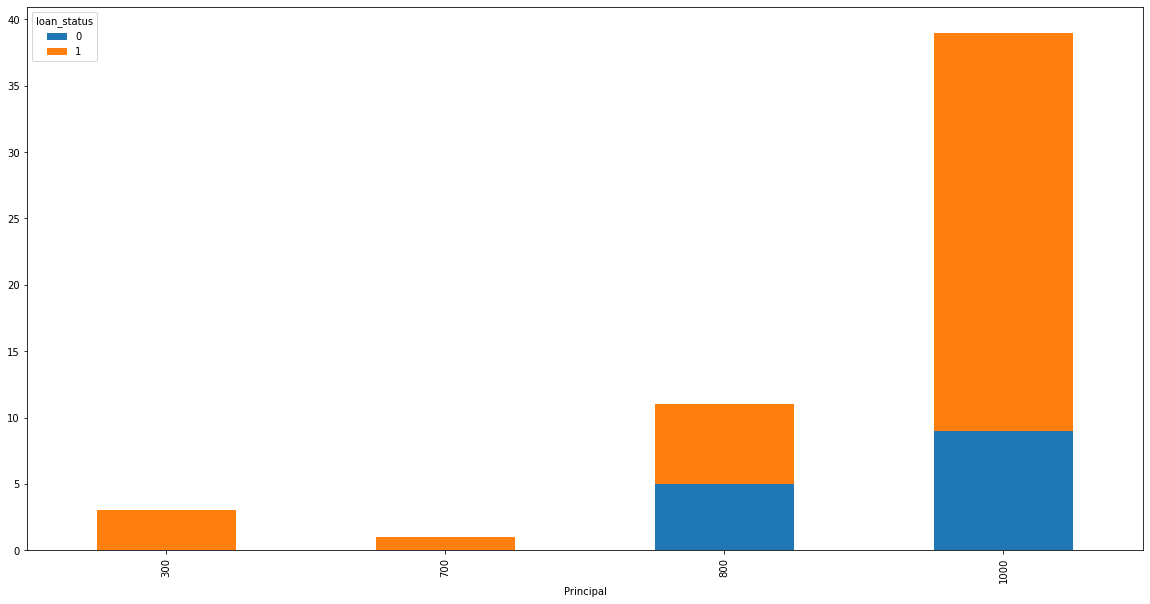

In [40]:
df.groupby(["Principal", "loan_status"]).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10)) 

<AxesSubplot:xlabel='deadline'>

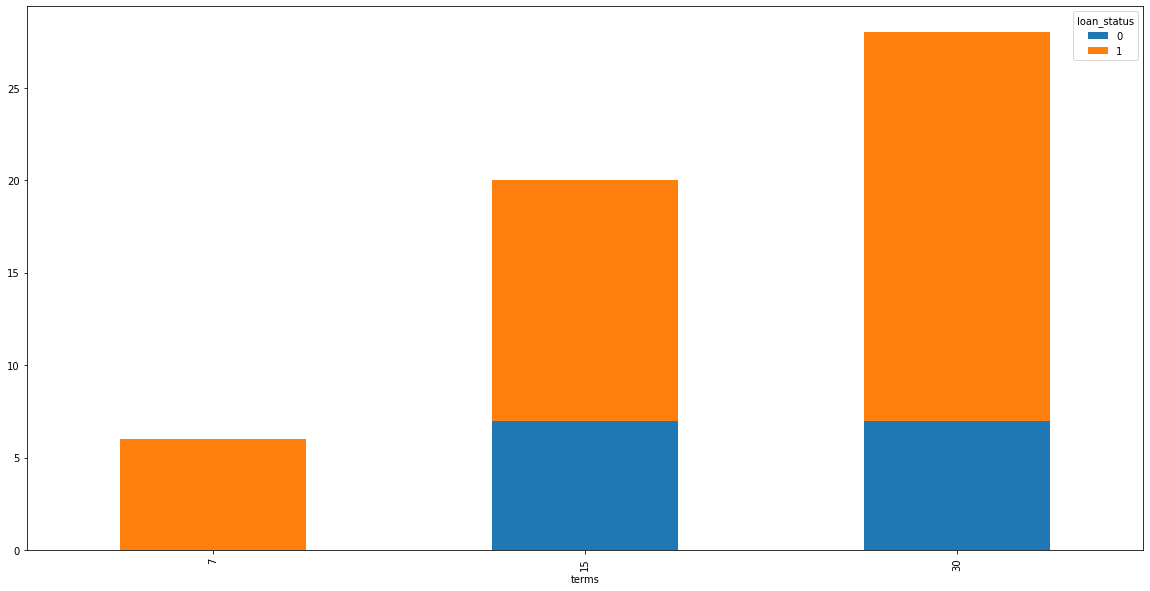

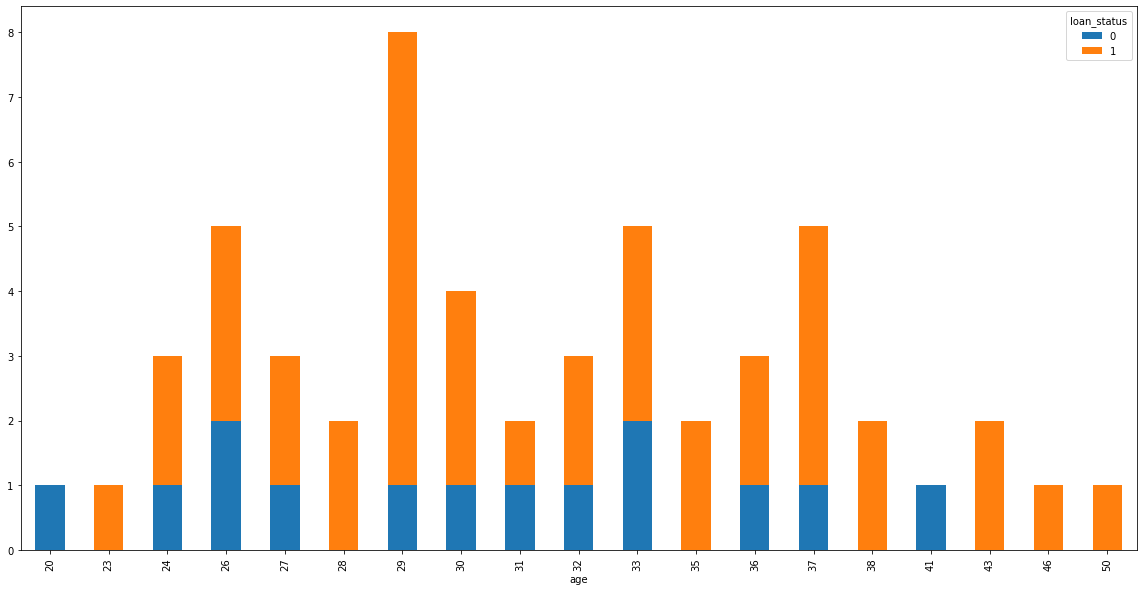

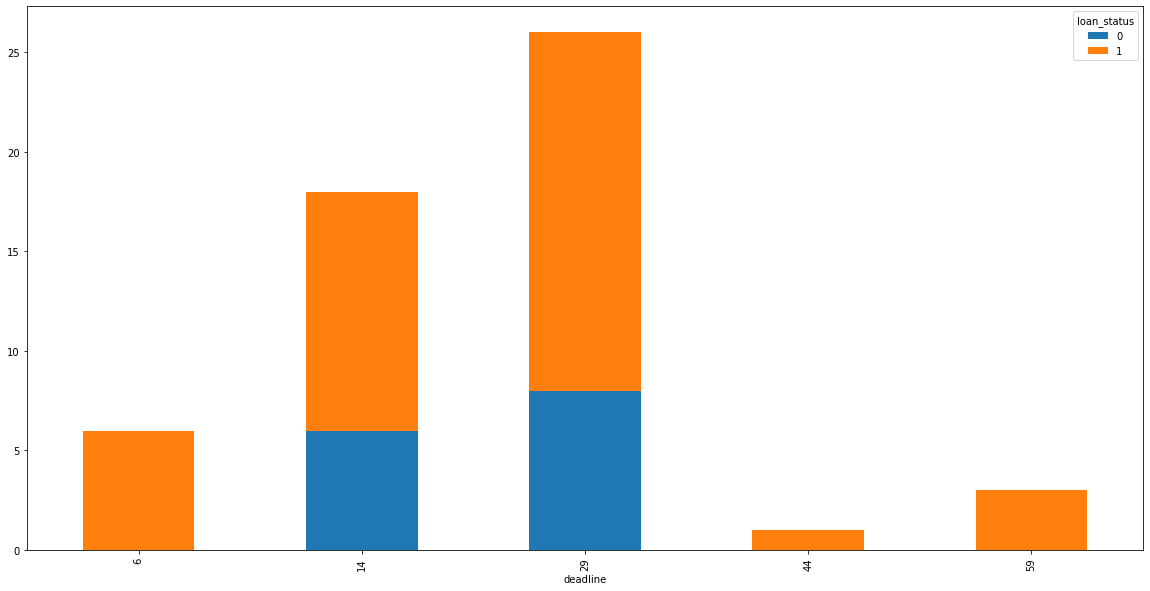

In [42]:
df.groupby(["terms", "loan_status"]).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10)) 
df.groupby(["age", "loan_status"]).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10)) 
df.groupby(["deadline", "loan_status"]).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10)) 

<AxesSubplot:xlabel='month'>

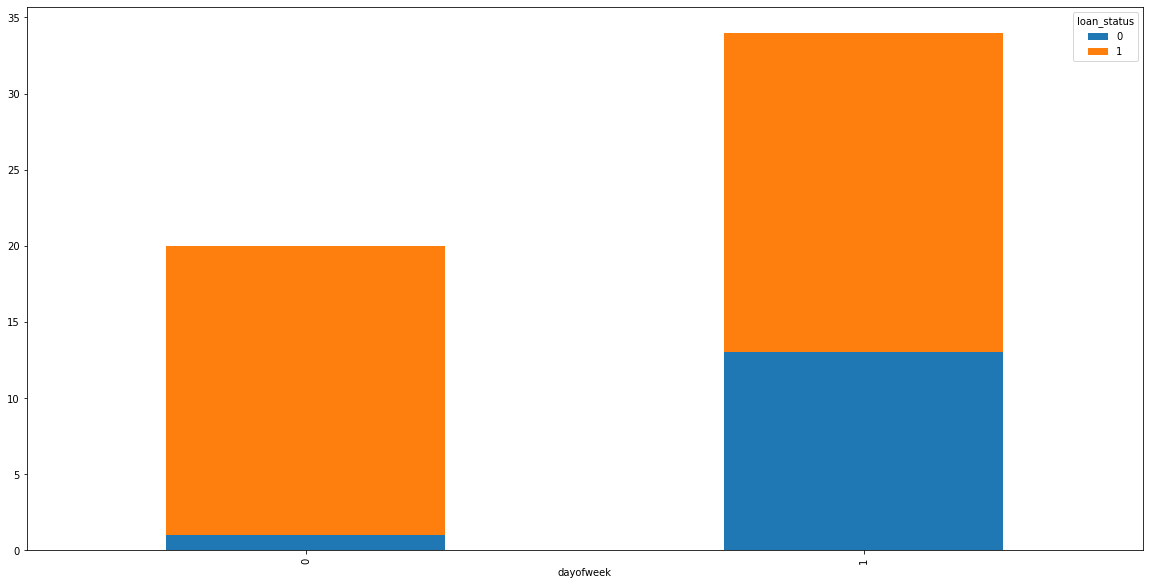

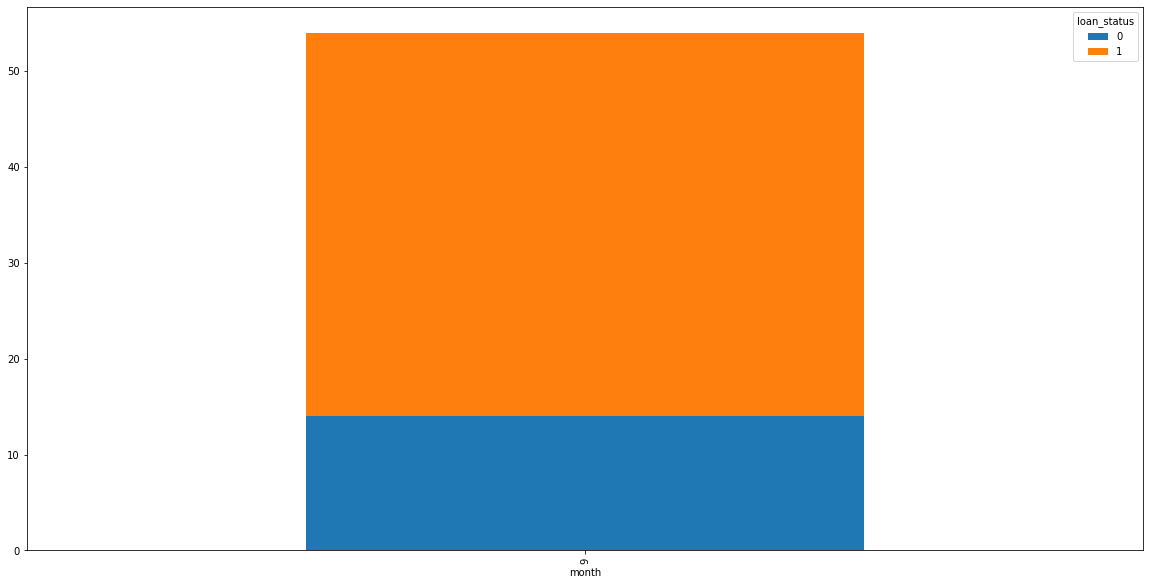

In [43]:
df.groupby(["dayofweek", "loan_status"]).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10)) 
df.groupby(["month", "loan_status"]).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10)) 

In [44]:
df.drop(['terms','month'],axis=1,inplace=True)

In [45]:
df.head()

,loan_status,Principal,effective_date,due_date,age,education,Gender,dayofweek,deadline
0,1,1000,2016-09-08,2016-10-07,50,Bechalor,1,0,29
1,1,300,2016-09-09,2016-09-15,35,Master or Above,0,1,6
2,1,1000,2016-09-10,2016-10-09,43,High School or Below,1,1,29
3,1,1000,2016-09-10,2016-10-09,26,college,0,1,29
4,1,800,2016-09-11,2016-09-25,29,Bechalor,0,1,14


In [11]:
df.drop(['effective_date','due_date'],axis=1,inplace=True)

In [49]:
df.head()

,loan_status,Principal,age,education,Gender,dayofweek,deadline
0,1,1000,50,Bechalor,1,0,29
1,1,300,35,Master or Above,0,1,6
2,1,1000,43,High School or Below,1,1,29
3,1,1000,26,college,0,1,29
4,1,800,29,Bechalor,0,1,14


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [12]:
features=df[['Principal','age','deadline']]
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#features = scaler.fit_transform(features)

In [13]:
features

,Principal,age,deadline
0,1000,50,29
1,300,35,6
2,1000,43,29
3,1000,26,29
4,800,29,14
5,700,33,14
6,1000,24,14
7,1000,32,29
8,800,27,14
9,1000,37,14


In [14]:
features=pd.concat([features,pd.get_dummies(df['education'])], axis=1)
features

,Principal,age,deadline,Bechalor,High School or Below,Master or Above,college
0,1000,50,29,1,0,0,0
1,300,35,6,0,0,1,0
2,1000,43,29,0,1,0,0
3,1000,26,29,0,0,0,1
4,800,29,14,1,0,0,0
5,700,33,14,0,1,0,0
6,1000,24,14,0,0,0,1
7,1000,32,29,1,0,0,0
8,800,27,14,0,0,0,1
9,1000,37,14,0,0,0,1


In [15]:
features.drop(['Master or Above'], axis = 1,inplace=True)

In [59]:
X_features=features.values

In [60]:
Y_feature=df['loan_status'].values
Y_feature

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [16]:
labels=df['loan_status']

<AxesSubplot:xlabel='Principal', ylabel='Density'>

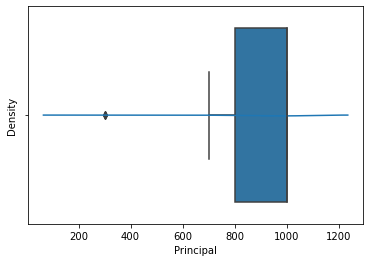

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.boxplot(features['Principal']) 
sns.distplot(features['Principal'])  #shud have used normalscaler n not standard scaler

In [27]:
features['Principal'].value_counts()

1000    39
800     11
300      3
700      1
Name: Principal, dtype: int64

In [32]:
features['Principal'].median()

1000.0

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    features, 
    labels, 
    test_size=0.20,
    random_state=4)

In [21]:
x_train

,Principal,age,deadline,Bechalor,High School or Below,college
34,1000,36,14,0,1,0
11,300,35,6,0,0,1
14,1000,37,29,0,1,0
42,800,41,14,0,0,1
24,1000,26,14,1,0,0
16,800,43,14,1,0,0
32,1000,29,59,0,0,1
15,1000,33,59,0,0,1
27,1000,46,29,0,0,1
18,1000,26,14,0,1,0


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler()
x_train[['Principal','age','deadline']] =scaler.fit_transform(x_train[['Principal','age','deadline']])
   

# LR = LogisticRegression(
#     C=0.01,
#     solver='liblinear'
# ).fit(normalized_x_train, y_train)

# normalized_x_test = pd.DataFrame(
#     scaler.transform(x_test),
#     columns = x_test.columns
# )
# y_test_pred = LR.predict(normalized_x_test)

In [23]:
x_train.head()

,Principal,age,deadline,Bechalor,High School or Below,college
34,0.472007,0.638422,-0.832360,0,1,0
11,-3.833268,0.478817,-1.450787,0,0,1
14,0.472007,0.798028,0.327191,0,1,0
42,-0.758072,1.436450,-0.832360,0,0,1
24,0.472007,-0.957633,-0.832360,1,0,0


In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc=SVC()
parameters1={
    'kernel':['linear','rbf'],
    'C':[0.1,1,10]
}

def print_results(results):
    print('best params: {}\n'.format(results.best_params_))
    means=results.cv_results_['mean_test_score']
    stds=results.cv_results_['std_test_score']
    for mean,std,params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3),round(std*2,3),params))

cv1=GridSearchCV(svc, parameters1, cv=5)  #i want 5 fold cross validation
cv1.fit(x_train,y_train.ravel())
print_results(cv1)

best params: {'C': 10, 'kernel': 'rbf'}

0.7 (+/-0.082) for {'C': 0.1, 'kernel': 'linear'}
0.7 (+/-0.082) for {'C': 0.1, 'kernel': 'rbf'}
0.65 (+/-0.163) for {'C': 1, 'kernel': 'linear'}
0.675 (+/-0.082) for {'C': 1, 'kernel': 'rbf'}
0.65 (+/-0.163) for {'C': 10, 'kernel': 'linear'}
0.719 (+/-0.188) for {'C': 10, 'kernel': 'rbf'}


In [86]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
parameters={
    'C':[0.001,0.01,0.1,1,10,100,1000]
}

cv=GridSearchCV(lr, parameters, cv=5)  #i want 5 fold cross validation
cv.fit(x_train,y_train)
print_results(cv)

best params: {'C': 1}

0.7 (+/-0.082) for {'C': 0.001}
0.7 (+/-0.082) for {'C': 0.01}
0.7 (+/-0.082) for {'C': 0.1}
0.725 (+/-0.163) for {'C': 1}
0.631 (+/-0.203) for {'C': 10}
0.675 (+/-0.163) for {'C': 100}
0.675 (+/-0.163) for {'C': 1000}


In [87]:
x_test[['Principal','age','deadline']]=scaler.fit_transform(x_test[['Principal','age','deadline']])
x_test

,Principal,age,deadline,Bechalor,High School or Below,college
4,0.714286,0.428571,0.347826,1,0,0
20,1.000000,0.500000,1.000000,0,0,1
52,0.714286,0.928571,0.347826,0,1,0
22,0.000000,1.000000,0.000000,0,0,0
12,1.000000,0.571429,1.000000,1,0,0
31,1.000000,0.928571,0.347826,0,1,0
28,1.000000,0.714286,1.000000,1,0,0
37,0.714286,0.000000,0.347826,0,0,1
6,1.000000,0.071429,0.347826,0,0,1
17,1.000000,0.642857,0.000000,1,0,0


In [88]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
from time import time
def evaluate_model(name,model,features,labels):
    start=time()
    pred=model.predict(features)
    end=time()
    accuracy=round(accuracy_score(labels,pred),3)
    precision=round(precision_score(labels,pred),3)
    recall=round(recall_score(labels,pred),3)
    print('{} --accuracy:{} / precision: {} / recall: {} / latency: {}ms'.format(name,accuracy,precision,recall,round((end-start),3)))

In [89]:
models={}
models['svc']=cv1.best_estimator_
models['lr']=cv.best_estimator_
for name,mdl in models.items():
    evaluate_model(name,mdl,x_test,y_test)

svc --accuracy:0.909 / precision: 0.909 / recall: 1.0 / latency: 0.002ms
lr --accuracy:0.909 / precision: 0.909 / recall: 1.0 / latency: 0.001ms


In [91]:
pred=models['svc'].predict(x_test)

In [92]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)